#### Mark Labinski
##### Problem Set 2
##### Question 4

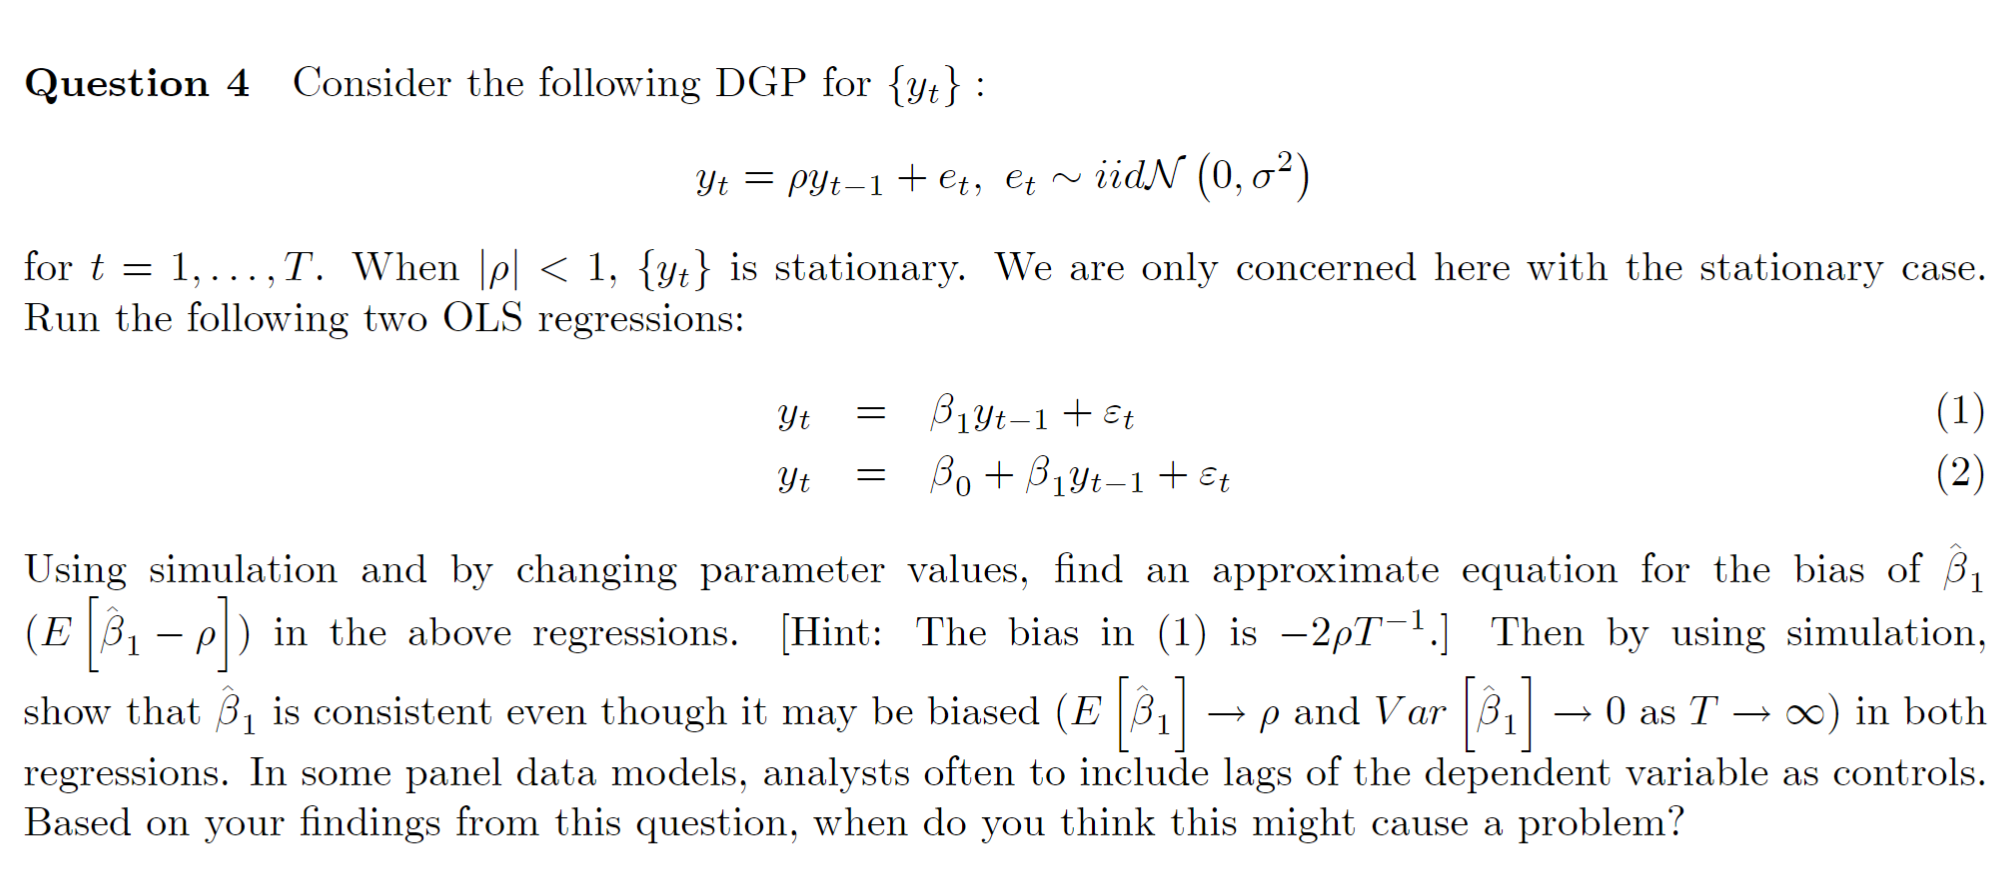

In [80]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [81]:
sig = 0.75
nsim = 1000
Tvec = [10,25,50,100,200]
rvec = [-0.9,-0.6,-0.3,0,0.3,0.6,0.9]
betahats1 = np.zeros((nsim,len(Tvec),len(rvec)))
betahats2 = np.zeros((nsim,len(Tvec),len(rvec)))
for rdx,rho in enumerate(rvec):
    for tdx,T in enumerate(Tvec):
        for isim in range(nsim):
            y = np.random.normal(0,sig,size=(T+100,1))
            for t in range(1,T+100):
                y[t] += rho*y[t-1]
            y = y[100:]
            y_0 = y[2:T]
            y_1 = y[1:T-1]
            xdata = sm.add_constant(y_1)
            betahats1[isim,tdx,rdx] = smf.OLS(y_0,y_1).fit().params[0]-rho
            betahats2[isim,tdx,rdx] = smf.OLS(y_0,xdata).fit().params[1]-rho     

In [33]:
# Show that regression one E[B] converges to rho (E[B] - rho) --> 0
dfB1 = pd.DataFrame(betahats1.mean(0))
dfB1 = dfB1.rename(columns={0:'rho=-0.9',1:'rho=-0.6',2:'rho=-0.3',3:'rho=0',
           4:'rho=0.3',5:'rho=0.6',6:'rho=0.9'})
dfB1

,rho=-0.9,rho=-0.6,rho=-0.3,rho=0,rho=0.3,rho=0.6,rho=0.9
0,0.126788,0.091767,0.054861,0.010642,-0.055789,-0.084264,-0.120002
1,0.059919,0.045347,0.010676,0.001579,-0.017384,-0.046020,-0.059226
2,0.032353,0.021457,0.014038,0.002864,-0.005142,-0.022828,-0.030899
3,0.013685,0.011373,0.010908,-0.001442,-0.002405,-0.017747,-0.015708
4,0.006653,0.006357,0.001301,0.001147,0.000434,-0.006653,-0.008968


In [35]:
# Show that for regression one, var(B) converges to 0 
dfvar1 = pd.DataFrame(betahats1.var(0))
dfvar1 = dfvar1.rename(columns={0:'rho=-0.9',1:'rho=-0.6',2:'rho=-0.3',3:'rho=0',
           4:'rho=0.3',5:'rho=0.6',6:'rho=0.9'})
dfvar1

,rho=-0.9,rho=-0.6,rho=-0.3,rho=0,rho=0.3,rho=0.6,rho=0.9
0,0.060496,0.083475,0.108644,0.104345,0.107380,0.083864,0.062085
1,0.015324,0.028489,0.035885,0.042107,0.038836,0.031015,0.016993
2,0.006175,0.014120,0.018334,0.019187,0.018636,0.012976,0.005964
3,0.002393,0.006340,0.009578,0.009716,0.008844,0.007265,0.002601
4,0.001029,0.003432,0.004516,0.005249,0.004639,0.002993,0.001097


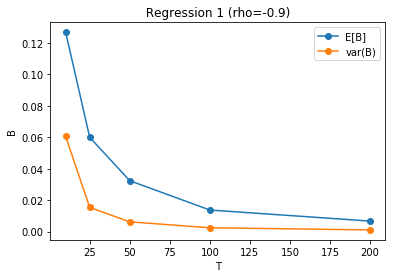

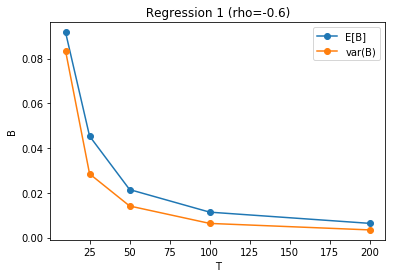

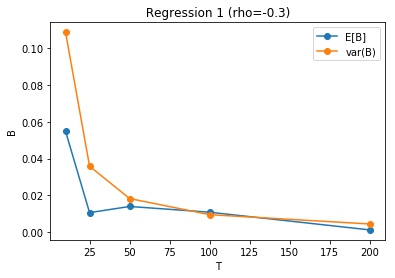

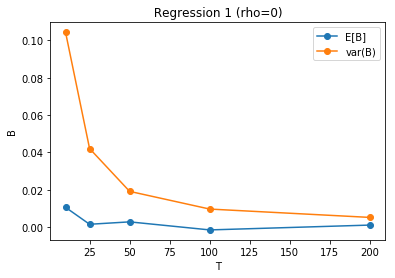

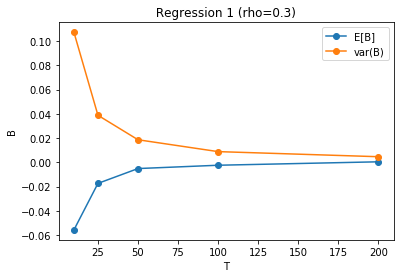

In [75]:
for i in range(5):  
    fig = plt.figure()
    x = [10,25,50,100,200]
    y = dfB1.iloc[:,i]
    x1 = [10,25,50,100,200]
    y1 = dfvar1.iloc[:,i]
    plt.plot(x,y,'o-', label = "E[B]")
    plt.plot(x1,y1,'o-',label = "var(B)" )
    plt.title(" Regression 1 (%s) " %dfB1.columns[i])
    plt.xlabel("T")
    plt.ylabel("B")
    plt.legend()
    plt.show()

In [76]:
# Show that for regression 2, E[B] converges to rho (E[B] - rho) --> 0
dfB2 = pd.DataFrame(betahats2.mean(0))
dfB2 = dfB2.rename(columns={0:'rho=-0.9',1:'rho=-0.6',2:'rho=-0.3',3:'rho=0',
           4:'rho=0.3',5:'rho=0.6',6:'rho=0.9'})
dfB2

,rho=-0.9,rho=-0.6,rho=-0.3,rho=0,rho=0.3,rho=0.6,rho=0.9
0,0.098258,0.035672,-0.037540,-0.112249,-0.223283,-0.309614,-0.430987
1,0.053746,0.027729,-0.019949,-0.044222,-0.071950,-0.122461,-0.174967
2,0.029738,0.011482,-0.000240,-0.019084,-0.033433,-0.058350,-0.077118
3,0.012613,0.007354,0.004314,-0.011496,-0.015975,-0.033432,-0.038813
4,0.006151,0.004231,-0.001991,-0.003893,-0.006174,-0.014816,-0.019744


In [77]:
# Show that for regression two, var(B) converges to 0 
dfvar2 = pd.DataFrame(betahats2.var(0))
dfvar2 = dfvar2.rename(columns={0:'rho=-0.9',1:'rho=-0.6',2:'rho=-0.3',3:'rho=0',
           4:'rho=0.3',5:'rho=0.6',6:'rho=0.9'})
dfvar2

,rho=-0.9,rho=-0.6,rho=-0.3,rho=0,rho=0.3,rho=0.6,rho=0.9
0,0.054462,0.075538,0.100985,0.108241,0.118553,0.129841,0.123469
1,0.014447,0.026993,0.034884,0.042694,0.041160,0.036580,0.031021
2,0.005920,0.013514,0.018006,0.018942,0.019107,0.014371,0.008555
3,0.002357,0.006239,0.009583,0.009630,0.008916,0.007592,0.003172
4,0.001020,0.003410,0.004478,0.005249,0.004686,0.003095,0.001245


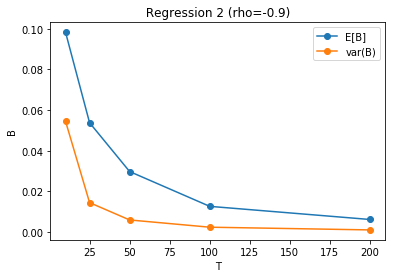

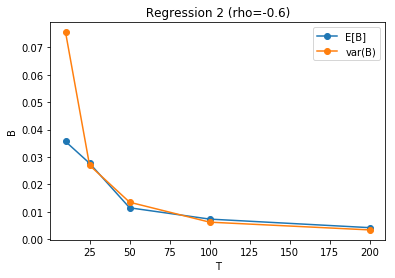

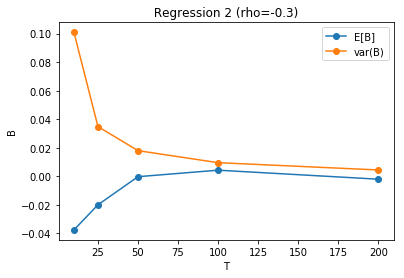

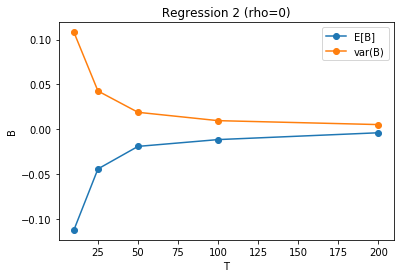

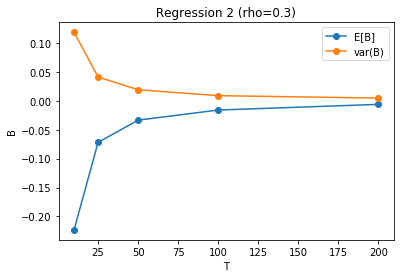

In [79]:
for i in range(5):  
    fig = plt.figure()
    x = [10,25,50,100,200]
    y = dfB2.iloc[:,i]
    x1 = [10,25,50,100,200]
    y1 = dfvar2.iloc[:,i]
    plt.plot(x,y,'o-', label = "E[B]")
    plt.plot(x1,y1,'o-',label = "var(B)" )
    plt.title(" Regression 2 (%s) " %dfB1.columns[i])
    plt.xlabel("T")
    plt.ylabel("B")
    plt.legend()
    plt.show()

In [35]:
# Show that for regression one, var(B) converges to 0 
dfvar1 = pd.DataFrame(betahats1.var(0))
dfvar1 = dfvar1.rename(columns={0:'rho=-0.9',1:'rho=-0.6',2:'rho=-0.3',3:'rho=0',
           4:'rho=0.3',5:'rho=0.6',6:'rho=0.9'})
dfvar1

,rho=-0.9,rho=-0.6,rho=-0.3,rho=0,rho=0.3,rho=0.6,rho=0.9
0,0.060496,0.083475,0.108644,0.104345,0.107380,0.083864,0.062085
1,0.015324,0.028489,0.035885,0.042107,0.038836,0.031015,0.016993
2,0.006175,0.014120,0.018334,0.019187,0.018636,0.012976,0.005964
3,0.002393,0.006340,0.009578,0.009716,0.008844,0.007265,0.002601
4,0.001029,0.003432,0.004516,0.005249,0.004639,0.002993,0.001097
